# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display well, please **have a look at the `.html` file** from the same repository.

## Abstract <a name="abstract"></a>

Our main goal in this project is to find social and economic world-wide relations of countries based on the state of their agricultural sector, using indicators such as imports, exports, production, self-sufficiency, etc. In order to find such indicators, we would like to use the data from the "Global Food & Agriculture Statistics" datasets. First, we would like to produce a map showing which countries "feed the world" i.e. which countries are net-exporting food. That map would contain a slider to show how this evolved over the past fifty years. Then we would like to show countrywise the level of food self-sufficiency i.e. the way a country does not need to trade with other ones in order to feed its population. We will also compare it to nations' economic development and see if some correlations can be found. We will visualize our best findings with several interactive maps and plots.

## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- How does the production and consumption of food look like from a geographical point of view ? Which countries are net food exporters or importers? How did this evolve over the last few decades ?
- What's the level of self-sufficiency in food production of individual countries and how does this change over time ?
- Is there a link between the GDP per capita and the agricultural trade balance ? Are countries that are net exporters or importers richer ? Are self-sufficient countries richer ?
- If we find any relations, are they also still valid if we check for specific crops ? Are there some crops that are mostly produced by richer countries, some that are mostly produced by poorer countries?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Giving countries an economic score based on their agricultural features](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display

**Auxiliary function imports:**

We have implemented some functions into a dedicated module (file `Milestone_2_scripts.py`) in order to simplify the code and make this notebook more enjoyable to read.

In [2]:
#from Milestone_2_scripts import *

**Setup:**

In [3]:
data_folder_path = "./Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Crops trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)        
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset would be a subset of the "Global Food & Agriculture Statistics" that is found in the proposed datasets list. In this dataset, we have seen that we could work with the production as well as import and export quantities per year and per country. We will add information about countries GDP to this database.

### 1.B. Loading the data set  <a name="1B"></a>

In [4]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We load each interresting dataset in the dictionary `df` :

In [5]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to get a first sense of the data.

In [6]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [7]:
display_df(df, interesting_datasets)

'Crops production'

Area Code         Area  Item Code                         Item  \
1650327        216     Thailand       1814          Coarse Grain, Total   
1337236        171  Philippines        809         Manila fibre (abaca)   
1175319        149        Nepal        401  Chillies and peppers, green   
307204          39         Chad       1717                Cereals,Total   
1810409        235   Uzbekistan        260                       Olives   

         Element Code         Element  Year Code  Year    Unit      Value Flag  
1650327          5312  Area harvested       1967  1967      ha   619560.0    A  
1337236          5419           Yield       1971  1971   hg/ha     6735.0   Fc  
1175319          5510      Production       1975  1975  tonnes        NaN    M  
307204           5312  Area harvested       1962  1962      ha  1277450.0    A  
1810409          5419           Yield       2013  2013   hg/ha    10000.0   Fc

'Crops trade'

Area Code                              Area  Item Code  \
14264555       5802  Land Locked Developing Countries        600   
10533980        213                      Turkmenistan       1923   
11665676        269                      EU(27)ex.int        622   
203427            7                            Angola       1934   
2792742         107                     Côte d'Ivoire        662   

                              Item  Element Code          Element  Year Code  \
14264555                   Papayas          5610  Import Quantity       1999   
10533980      Meat Fresh+Ch+Frozen          5622     Import Value       2008   
11665676          Juice, fruit nes          5610  Import Quantity       2011   
203427    Milk Condensed+Dry+Fresh          5922     Export Value       1974   
2792742               Cocoa, paste          5610  Import Quantity       2010   

          Year      Unit     Value Flag  
14264555  1999    tonnes     526.0    A  
10533980  2008  1000 US$    8565.0    A  
11665676  2011    tonnes  112731.0    A  
203427    1974  1000 US$      42.0    A  
2792742   2010    tonnes       0.0    F

'Consumer price indices'

Area Code                         Area  Item Code  \
43819        117            Republic of Korea      23012   
3260          12                      Bahamas      23012   
32907        132                     Maldives      23013   
57862        215  United Republic of Tanzania      23012   
20857         84                       Greece      23013   

                                                Item  Months Code     Months  \
43819  Consumer Prices, General Indices (2010 = 100)         7005        May   
3260   Consumer Prices, General Indices (2010 = 100)         7005        May   
32907     Consumer Prices, Food Indices (2010 = 100)         7004      April   
57862  Consumer Prices, General Indices (2010 = 100)         7009  September   
20857     Consumer Prices, Food Indices (2010 = 100)         7011   November   

       Year Code  Year  Unit       Value Flag    Note  
43819       2012  2012   NaN  106.247855    X    2010  
3260        2012  2012   NaN  105.798205    X    2010  
32907       2014  2014   NaN  103.914734    X  2012M6  
57862       2014  2014   NaN  150.118900    X    2010  
20857       2000  2000   NaN   73.789450    X    2009

'Macroeconomy'

Area Code             Area  Item Code  \
526554        251           Zambia      22015   
248308         83         Kiribati      22015   
541567       5204  Central America      22008   
239303        110            Japan      22075   
95230          39             Chad      22016   

                                                   Item  Element Code  \
526554                    Gross Fixed Capital Formation          6117   
248308                    Gross Fixed Capital Formation          6156   
541567                           Gross Domestic Product          6108   
239303                Value Added (Total Manufacturing)          6103   
95230   Value Added (Agriculture, Forestry and Fishing)          6108   

                                          Element  Year Code  Year      Unit  \
526554           Share of GDP in US$, 2005 prices       1997  1997         %   
248308  Annual growth Local Currency, 2005 prices       2001  2001         %   
541567                     Value US$, 2005 prices       2012  2012  millions   
239303                        Share of GDP in US$       1983  1983         %   
95230                      Value US$, 2005 prices       1978  1978  millions   

               Value Flag  
526554  1.154083e+01   Fc  
248308 -3.334630e+00   Fc  
541567  1.159624e+06    A  
239303  2.614807e+01   Fc  
95230   7.933683e+02  XAM

'Livestock production'

Area Code            Area  Item Code             Item  Element Code  \
156220       5706  European Union       1749  Sheep and Goats          5111   
4000            9       Argentina       1068            Ducks          5112   
80202         148           Nauru       1057         Chickens          5112   
20650          33          Canada       1034             Pigs          5111   
64203         118          Kuwait       1126           Camels          5111   

       Element  Year Code  Year       Unit        Value Flag  
156220  Stocks       1970  1970       Head  122557347.0    A  
4000    Stocks       1964  1964  1000 Head       1550.0    F  
80202   Stocks       1967  1967  1000 Head          2.0    F  
20650   Stocks       1992  1992       Head   10596300.0  NaN  
64203   Stocks       1970  1970       Head      10000.0    F

'Live animals trade'

Area Code                   Area  Item Code             Item  \
605488       5401         Eastern Europe        946        Buffaloes   
340567        162                 Norway       1079          Turkeys   
408765        186  Serbia and Montenegro       1884     Live Animals   
162482         63                Estonia       1921  Bovine, Animals   
504208        237               Viet Nam       1034             Pigs   

        Element Code          Element  Year Code  Year      Unit   Value Flag  
605488          5608  Import Quantity       1968  1968      Head     NaN    A  
340567          5922     Export Value       1995  1995  1000 US$     NaN    M  
408765          5622     Import Value       1997  1997  1000 US$  4653.0    A  
162482          5622     Import Value       2012  2012  1000 US$   853.0    A  
504208          5908  Export Quantity       1966  1966      Head  4701.0  NaN

At first glance, our datasets seem very clean.

Each of our dataset contains a column "Year" and a column that is either named "Area" or "Country". This is a great news for us since we want to do a both geographical and time-related analysis.

The columns "Area" and "Country" both correspond to the country except that the "Area" may contains a group of country (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will clean the datasets. The final goal is to produce one uniformized and normalized dataset on which we could work (see [1.F](#1F)).

Such a cleaned dataset may look like this  (in a very simplistic way):

    Country | Year | GDP | Crops production | Livestock production

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes without the unuseful data.

In [8]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>

In [9]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [10]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

In [11]:
display(df_useful["GDP"].sample(5))

Area Code                        Area  Year         Value
550676       5305                Western Asia  1989  4.193632e+05
119027        107               Côte d'Ivoire  1989  1.071445e+04
51649          17                     Bermuda  1982  1.101104e+03
556580       5404              Western Europe  1998  4.985618e+06
222435        102  Iran (Islamic Republic of)  2003  1.535448e+05

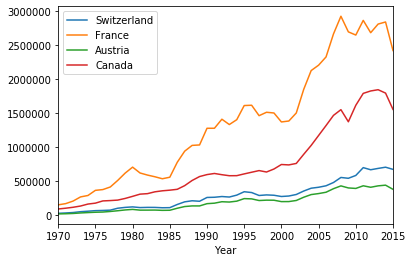

In [12]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

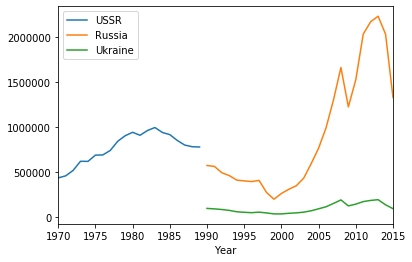

In [13]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>

In [14]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [15]:
df_useful['Crops Area harvested'] = food_crop_area_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Seed'] = food_crop_seed_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Yield'] =  food_crop_yield_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [16]:
display(df_useful['Crops Area harvested'].sample(5))
display(df_useful['Crops Production'].sample(5))
display(df_useful['Crops Seed'].sample(5))
display(df_useful['Crops Yield'].sample(5))

Area Code                                Area  \
24109            4                             Algeria   
382407         214           China, Taiwan Province of   
1342135        171                         Philippines   
1705499        223                              Turkey   
1826059        236  Venezuela (Bolivarian Republic of)   

                                                 Item  Year Unit     Value  
24109                                          Garlic  1981   ha    4650.0  
382407                                 Sweet potatoes  1995   ha   10627.0  
1342135  Tangerines, mandarins, clementines, satsumas  1970   ha    7080.0  
1705499                                    Chick peas  1995   ha  745000.0  
1826059                                      Tomatoes  2002   ha    9570.0

Area Code           Area                     Item  Year    Unit  \
938865         114          Kenya          Castor oil seed  1961  tonnes   
2396303       5500        Oceania           Sweet potatoes  1961  tonnes   
1094431        137      Mauritius  Fruit excl Melons,Total  1963  tonnes   
2176122       5300           Asia                Tung nuts  1983  tonnes   
1196569        153  New Caledonia     Plantains and others  2007  tonnes   

            Value  
938865     3000.0  
2396303  362096.0  
1094431    6220.0  
2176122  368000.0  
1196569     477.0

Area Code                              Area  \
2515031       5802  Land Locked Developing Countries   
191364          80            Bosnia and Herzegovina   
871749         105                            Israel   
2004213       5104                   Southern Africa   
1947669       5101                    Eastern Africa   

                              Item  Year    Unit    Value  
2515031             Sweet potatoes  1969  tonnes   1650.0  
191364               Cow peas, dry  2013  tonnes      6.0  
871749   Cereals (Rice Milled Eqv)  1964  tonnes  17466.0  
2004213                     Barley  1974  tonnes   5261.0  
1947669              Cow peas, dry  1989  tonnes  12677.0

Area Code         Area                          Item  Year   Unit  \
677193          81        Ghana                       Papayas  2012  hg/ha   
1660678        176  Timor-Leste  Mangoes, mangosteens, guavas  1996  hg/ha   
985188         121      Lebanon        Peaches and nectarines  1979  hg/ha   
168718          18       Bhutan   Chillies and peppers, green  1981  hg/ha   
1061594        133         Mali                        Millet  1999  hg/ha   

            Value  
677193    33333.0  
1660678   63235.0  
985188   285714.0  
168718    47222.0  
1061594    8784.0

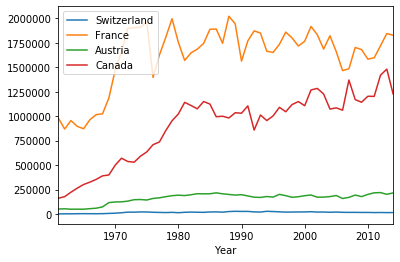

In [17]:
select_Maize = df_useful['Crops Area harvested']['Item']=='Maize'
maize_df = df_useful['Crops Area harvested'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

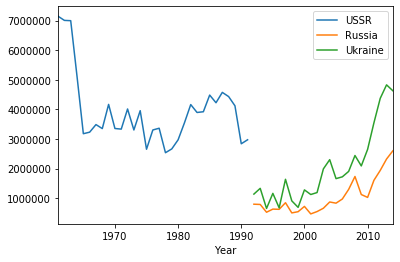

In [18]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

In [19]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'

df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [20]:
display(df_useful['Livestock production'].sample(5))

Area Code             Area             Item  Year       Unit     Value
74228         137        Mauritius            Ducks  1962  1000 Head      20.0
94088         179            Qatar         Chickens  2004  1000 Head    4500.0
105662         25  Solomon Islands    Poultry Birds  1987  1000 Head     140.0
103645        196       Seychelles  Sheep and Goats  2008       Head    5200.0
18297          29          Burundi            Sheep  1998       Head  123220.0

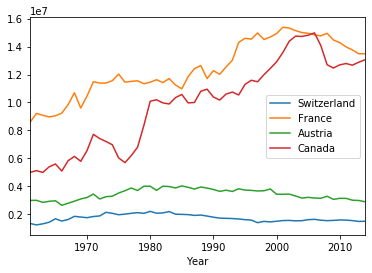

In [21]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

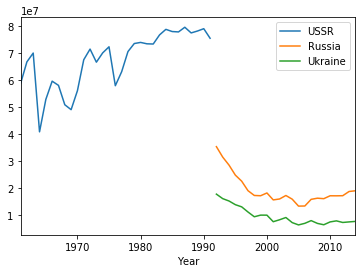

In [22]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>

In [23]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [24]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code                              Area             Item  Year  \
122635         48                        Costa Rica          Turkeys  2008   
97264         351                             China        Buffaloes  1971   
269022        123                           Liberia           Cattle  1983   
258820        118                            Kuwait  Sheep and Goats  1991   
137287        250  Democratic Republic of the Congo           Cattle  1980   

             Unit     Value  
122635  1000 Head       4.0  
97264        Head    3735.0  
269022       Head   16377.0  
258820       Head  809207.0  
137287       Head      90.0

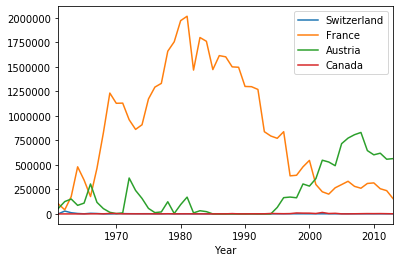

In [25]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

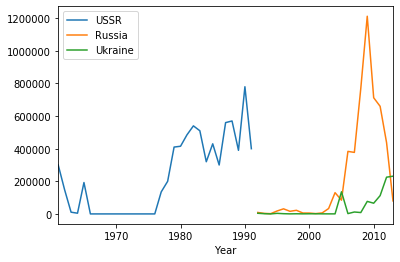

In [26]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In [27]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code                               Area              Item  Year  \
244543        110                              Japan             Goats  2001   
630434       5502                          Melanesia  Animals live nes  1998   
505884        249                              Yemen          Chickens  1999   
656297       5815  Low Income Food Deficit Countries             Goats  1978   
349156        165                           Pakistan            Horses  1979   

             Unit      Value  
244543       Head        NaN  
630434       Head        0.0  
505884  1000 Head        0.0  
656297       Head  1480038.0  
349156       Head        7.0

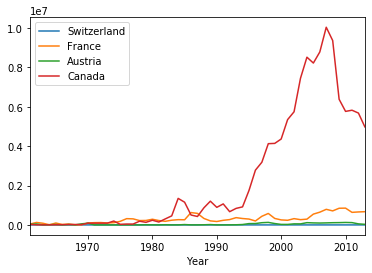

In [28]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

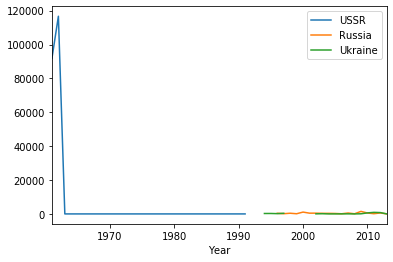

In [29]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In [30]:
selection_import_quantities = df['Crops trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Crops trade']["Element"] == 'Export Quantity'

df_useful['Crops import quantities'] = df['Crops trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops export quantities'] = df['Crops trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [31]:
display(df_useful['Crops import quantities'].sample(5))

Area Code                  Area  \
6464411        134                 Malta   
2655928         46                 Congo   
8613360        185    Russian Federation   
2224009         96  China, Hong Kong SAR   
9957759        211           Switzerland   

                                                 Item  Year    Unit     Value  
6464411                                Flour, mustard  2002  tonnes       4.0  
2655928  Tangerines, mandarins, clementines, satsumas  1989  tonnes       0.0  
8613360                                      Potatoes  1997  tonnes  119192.0  
2224009                                Flax fibre raw  1967  tonnes       0.0  
9957759                               Rubber, natural  2006  tonnes    1955.0

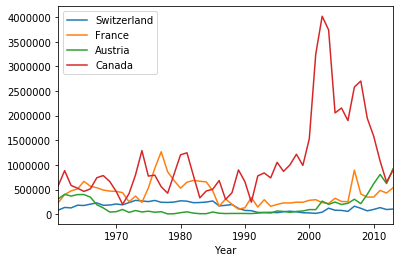

In [32]:
select_Maize = df_useful['Crops import quantities']['Item']=='Maize'
maize_df = df_useful['Crops import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

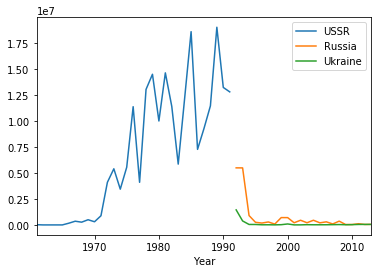

In [33]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In [34]:
display(df_useful['Crops export quantities'].sample(5))

Area Code             Area                                  Item  \
1933432          33           Canada  Meat, cattle, boneless (beef & veal)   
6036230         123          Liberia                              Milk Dry   
11096178        235       Uzbekistan                            Poppy seed   
3431484          59            Egypt                      Coffee, extracts   
12533720       5204  Central America                        Flour, mustard   

          Year    Unit    Value  
1933432   1989  tonnes  51240.0  
6036230   2012  tonnes      0.0  
11096178  1995  tonnes      NaN  
3431484   1967  tonnes      0.0  
12533720  1978  tonnes      0.0

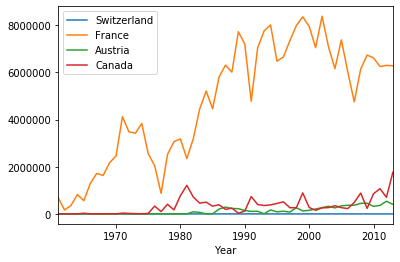

In [35]:
select_Maize = df_useful['Crops export quantities']['Item']=='Maize'
maize_df = df_useful['Crops export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

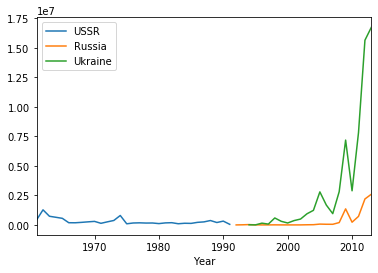

In [36]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

In [37]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area',"Year",'Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [38]:
display(df_useful['Consumer price indices'].sample(5))

Area  Year       Value
1531           Japan  2000   97.492035
2489         Romania  2010  164.208823
1122           Gabon  2007   91.897597
1388         Iceland  2011  123.361873
3192  United Kingdom  2006   81.338998

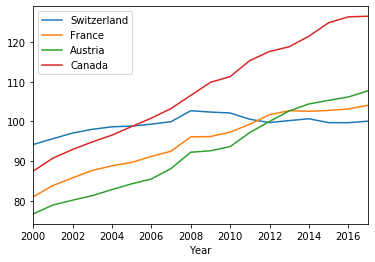

In [39]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["Switzerland", 'France', 'Austria', "Canada"])

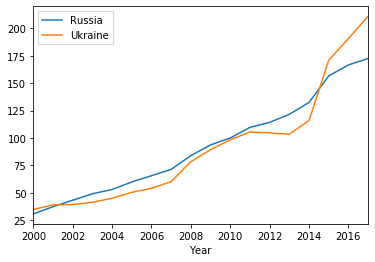

In [40]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(['Russia', 'Ukraine'])

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the areas which are real countries are exactely the ones with an "Area Code" below 5000.

In [41]:
#remove Area code >= 5000
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<5000
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code          Area  Year         Value
108927         45       Comoros  1978    160.644161
127763         50        Cyprus  2011  27428.867588
368534        170          Peru  1970   5829.069768
410810        194  Saudi Arabia  1972   9664.176131
207048         93         Haiti  2012   7820.337702

Removing areas which are not countries in Crops Area harvested


Area Code          Area                      Item  Year Unit  \
418939          47  Cook Islands        Citrus Fruit,Total  1985   ha   
937498         114         Kenya                    Barley  1966   ha   
98516           11       Austria  Vegetables&Melons, Total  1985   ha   
1062788        133          Mali               Rice, paddy  1978   ha   
1862734        251        Zambia                     Maize  1992   ha   

            Value  
418939      116.0  
937498     8943.0  
98516     12777.0  
1062788  111675.0  
1862734  661305.0

Removing areas which are not countries in Crops Production


Area Code                        Area                          Item  \
41829            7                      Angola                      Tomatoes   
831626         102  Iran (Islamic Republic of)                   Onions, dry   
1489516        186       Serbia and Montenegro                   Raspberries   
725090          89                   Guatemala                       Papayas   
572078          60                 El Salvador  Mangoes, mangosteens, guavas   

         Year    Unit     Value  
41829    2000  tonnes   13000.0  
831626   1993  tonnes  957404.0  
1489516  1995  tonnes   53084.0  
725090   2002  tonnes   41000.0  
572078   1993  tonnes   17700.0

Removing areas which are not countries in Crops Seed


Area Code      Area                    Item  Year    Unit    Value
757377         93     Haiti           Cow peas, dry  1966  tonnes   2340.0
203986         21    Brazil  Groundnuts, with shell  1978  tonnes  11547.0
589588        238  Ethiopia                   Maize  2013  tonnes  63446.0
883648        106     Italy               Peas, dry  1986  tonnes   3155.0
550334         58   Ecuador                   Wheat  1999  tonnes   3421.0

Removing areas which are not countries in Crops Yield


Area Code        Area                           Item  Year   Unit  \
538674          58     Ecuador  Broad beans, horse beans, dry  1972  hg/ha   
914477         110       Japan                 Taro (cocoyam)  1964  hg/ha   
1491850        196  Seychelles      Fruit, tropical fresh nes  2002  hg/ha   
72115           10   Australia      Cauliflowers and broccoli  1995  hg/ha   
1234512        159     Nigeria                         Millet  2012  hg/ha   

            Value  
538674     7149.0  
914477   124810.0  
1491850   53425.0  
72115    103887.0  
1234512    9642.0

Removing areas which are not countries in Livestock production


Area Code          Area                  Item  Year  Unit      Value
11284          53         Benin                 Sheep  1999  Head   653530.0
7540           13       Bahrain                Camels  1981  Head      730.0
103824        197  Sierra Leone                 Goats  1971  Head   105000.0
88279         166        Panama                Cattle  2012  Head  1722500.0
18986          35    Cabo Verde  Cattle and Buffaloes  1985  Head    10000.0

Removing areas which are not countries in Live animals import quantities


Area Code                      Area      Item  Year  Unit  Value
191183         84                    Greece    Camels  2012  Head    NaN
467047        222                   Tunisia      Pigs  1996  Head    0.0
159434         60               El Salvador     Sheep  1973  Head    0.0
489817        231  United States of America  Beehives  2000    No    NaN
483790        229            United Kingdom     Goats  1962  Head    0.0

Removing areas which are not countries in Live animals export quantities


Area Code                         Area              Item  Year  \
120686         48                   Costa Rica          Beehives  1967   
487194        215  United Republic of Tanzania             Goats  1974   
1199            3                      Albania  Animals live nes  1994   
21208          10                    Australia             Goats  1991   
84967          33                       Canada          Chickens  1970   

             Unit    Value  
120686         No      NaN  
487194       Head      NaN  
1199         Head      NaN  
21208        Head  72190.0  
84967   1000 Head   2919.0

Removing areas which are not countries in Crops import quantities


Area Code                              Area              Item  Year  \
1591180         27                          Bulgaria  Walnuts, shelled  2011   
3571560         61                 Equatorial Guinea     Sugar refined  1964   
8564405        183                           Romania          Rapeseed  2001   
4551993         90                            Guinea    Textile Fibres  2006   
3116915        250  Democratic Republic of the Congo       Spices, nes  2006   

           Unit  Value  
1591180  tonnes  297.0  
3571560  tonnes  700.0  
8564405  tonnes  161.0  
4551993  tonnes  313.0  
3116915  tonnes   88.0

Removing areas which are not countries in Crops export quantities


Area Code                       Area  \
1605123         27                   Bulgaria   
1887510         32                   Cameroon   
8416272        117          Republic of Korea   
9268691        199                   Slovakia   
2465578        214  China, Taiwan Province of   

                                    Item  Year    Unit   Value  
1605123                Rape+Mustard Seed  1962  tonnes  4860.0  
1887510                Eggs Liquid,Dried  1965  tonnes     0.0  
8416272               Fat, nes, prepared  1967  tonnes     0.0  
9268691                 Fruit, dried nes  2010  tonnes  1227.0  
2465578  Juice, grapefruit, concentrated  1962  tonnes     NaN

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

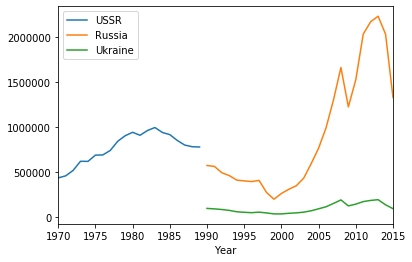

In [42]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax.legend(["USSR", 'Russia', 'Ukraine'])

In order to vizualize folium maps, we need to associate each country a value. The geojson file that we use is not timestamped and only countries that exist nowadays are inside it. As some countries has been dissolved during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to map the former country value to each of the current ones. For instance in 1982, USSR GDP is around one trillion $. Therefore, if we associate (only for folium map purposes) this value to each current country that succeeded USSR, all these countries will appear the same color in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to identify which countries appeared and disappeared from the dataset and at which year. Then we will use this result along with some historical research in our `visualise_world_data_folium` function ([1Ea](#1Ea)).

In [43]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with country names and normalizing the features.

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>

In [44]:
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea"}

def correct_country_names(old_name):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name


In [45]:
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(correct_country_names)

GDP
Crops Area harvested
Crops Production
Crops Seed
Crops Yield
Livestock production
Live animals import quantities
Live animals export quantities
Crops import quantities
Crops export quantities
Consumer price indices


In [46]:
def visualise_world_data_folium(df, year, logScale=True):
    dic = {'USSR':                            ['Armenia', 'Azerbaijan','Belarus', 'Estonia', 'Georgia',
                                               'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
                                               'Montenegro', 'Republic of Moldova', 'Russia',
                                               'Republic of Serbia', 'Timor-Leste', 'Turkmenistan', 'Ukraine',
                                               'Uzbekistan'],
           'Ethiopia PDR':                     ['Eritrea','Ethiopia'],
           'Yugoslav SFR':                     ['Kosovo', 'Slovenia', 'Croatia',
                                                'Macedonia', 'Bosnia and Herzegovina'],
           'Yemen Dem' :                       ['Yemen'],        
           'Czechoslovakia':                   ["Czech Republic", 'Slovakia'],
           'Netherlands Antilles (former)':    ['Curaçao', 'Sint Maarten (Dutch Part)'],
           'Sudan (former)':                   ['South Sudan', 'Sudan']
          }
    def add_new_names(old_name):
        if old_name in dic.keys() :
            return dic[old_name]
        return old_name
    to_plot=df[df["Year"]==year]
    to_plot=(to_plot[['Area','Value']]
             .dropna()
             .groupby('Area')             
             .mean()
             .reset_index()
             .dropna())    
    to_plot['Area']=to_plot['Area'].apply(add_new_names)
    to_plot = to_plot.explode('Area')
    if logScale :
        to_plot.Value=np.log10(to_plot.Value)
    
    m = folium.Map(location=[40,-10],zoom_start=1.6)
    folium.Choropleth(
        geo_data=f"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",
        data=to_plot,
        columns=['Area', 'Value'],
        key_on='feature.properties.name',
        fill_color='YlGn',fill_opacity=0.7,line_opacity=0.2,nan_fill_opacity=0.0
    ).add_to(m)

    folium.LayerControl().add_to(m)

    return(m)

In [47]:
display(visualise_world_data_folium(df_useful["GDP"], 1985, True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

TODO, explain why (heavy tail, right skewed, power laws) + do it

For instance the distribution of GDP look a bit like a power law.

C:\Users\Martin\.conda\envs\ada\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Martin\.conda\envs\ada\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


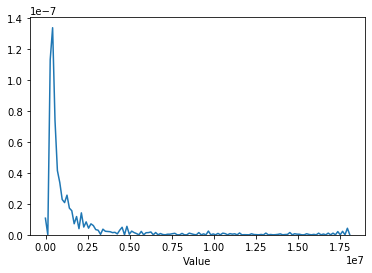

In [48]:
sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

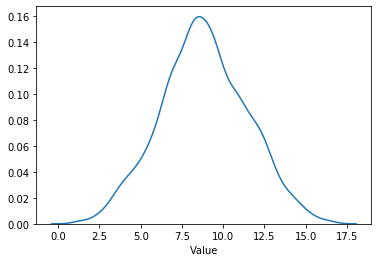

In [49]:
#looks better with log scale
sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one uniformized dataframe `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation | CPI
    
In this uniformized dataframe, a tuple `(Country, Year)` uniquely identifies a row.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

In [50]:
need_pivot = ['Crops Area harvested',
              'Crops Production',
              'Crops Seed',
              'Crops Yield',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Crops import quantities',
              'Crops export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_useful[df_name].sample(5))

Item                  Anise, badian, fennel, coriander Crops Area harvested  \
Unit                                                                     ha   
Area             Year                                                         
Marshall Islands 2013                                                NaN      
Portugal         1999                                                NaN      
Cayman Islands   1983                                                NaN      
Somalia          2006                                                NaN      
Albania          2000                                                NaN      

Item                  Apples Crops Area harvested  \
Unit                                           ha   
Area             Year                               
Marshall Islands 2013                         NaN   
Portugal         1999                     24300.0   
Cayman Islands   1983                         NaN   
Somalia          2006                         NaN   
Albania          2000                      2300.0   

Item                  Apricots Crops Area harvested  \
Unit                                             ha   
Area             Year                                 
Marshall Islands 2013                           NaN   
Portugal         1999                         657.0   
Cayman Islands   1983                           NaN   
Somalia          2006                           NaN   
Albania          2000                         403.0   

Item                  Areca nuts Crops Area harvested  \
Unit                                               ha   
Area             Year                                   
Marshall Islands 2013                             NaN   
Portugal         1999                             NaN   
Cayman Islands   1983                             NaN   
Somalia          2006                             NaN   
Albania          2000                             NaN   

Item                  Artichokes Crops Area harvested  \
Unit                                               ha   
Area             Year                                   
Marshall Islands 2013                             NaN   
Portugal         1999                             NaN   
Cayman Islands   1983                             NaN   
Somalia          2006                             NaN   
Albania          2000                             NaN   

Item                  Asparagus Crops Area harvested  \
Unit                                              ha   
Area             Year                                  
Marshall Islands 2013                            NaN   
Portugal         1999                            NaN   
Cayman Islands   1983                            NaN   
Somalia          2006                            NaN   
Albania          2000                            NaN   

Item                  Avocados Crops Area harvested  \
Unit                                             ha   
Area             Year                                 
Marshall Islands 2013                           NaN   
Portugal         1999                       12484.0   
Cayman Islands   1983                           NaN   
Somalia          2006                           NaN   
Albania          2000                           NaN   

Item                  Bambara beans Crops Area harvested  \
Unit                                                  ha   
Area             Year                                      
Marshall Islands 2013                                NaN   
Portugal         1999                                NaN   
Cayman Islands   1983                                NaN   
Somalia          2006                                NaN   
Albania          2000                                NaN   

Item                  Bananas Crops Area harvested  \
Unit                                            ha   
Area             Year                                
Marshall Islands 2013                          NaN   


Item                    Anise, badian, fennel, coriander Crops Production  \
Unit                                                               tonnes   
Area               Year                                                     
Faroe Islands      1984                                               NaN   
Indonesia          1968                                               NaN   
Gambia             1986                                               NaN   
Republic of Serbia 2008                                             716.0   
Costa Rica         2012                                               NaN   

Item                    Apples Crops Production Apricots Crops Production  \
Unit                                     tonnes                    tonnes   
Area               Year                                                     
Faroe Islands      1984                     NaN                       NaN   
Indonesia          1968                     NaN                       NaN   
Gambia             1986                     NaN                       NaN   
Republic of Serbia 2008                235601.0                   22301.0   
Costa Rica         2012                     NaN                       NaN   

Item                    Areca nuts Crops Production  \
Unit                                         tonnes   
Area               Year                               
Faroe Islands      1984                         NaN   
Indonesia          1968                     14000.0   
Gambia             1986                         NaN   
Republic of Serbia 2008                         NaN   
Costa Rica         2012                         NaN   

Item                    Artichokes Crops Production  \
Unit                                         tonnes   
Area               Year                               
Faroe Islands      1984                         NaN   
Indonesia          1968                         NaN   
Gambia             1986                         NaN   
Republic of Serbia 2008                         NaN   
Costa Rica         2012                        32.0   

Item                    Asparagus Crops Production Avocados Crops Production  \
Unit                                        tonnes                    tonnes   
Area               Year                                                        
Faroe Islands      1984                        NaN                       NaN   
Indonesia          1968                        NaN                   50000.0   
Gambia             1986                        NaN                       NaN   
Republic of Serbia 2008                        NaN                       NaN   
Costa Rica         2012                      127.0                   26960.0   

Item                    Bambara beans Crops Production  \
Unit                                            tonnes   
Area               Year                                  
Faroe Islands      1984                            NaN   
Indonesia          1968                            NaN   
Gambia             1986                            NaN   
Republic of Serbia 2008                            NaN   
Costa Rica         2012                            NaN   

Item                    Bananas Crops Production Barley Crops Production  ...  \
Unit                                      tonnes                  tonnes  ...   
Area               Year                                                   ...   
Faroe Islands      1984                      NaN                     NaN  ...   
Indonesia          1968                 920000.0                     NaN  ...   
Gambia             1986                      NaN                     NaN  ...   
Republic of Serbia 2008                      NaN                344141.0  ...   
Costa Rica         2012                2136437.0                     NaN  ...   

Item                    Sweet potatoes Crops Production  \
Unit                                             tonnes   
Area       

Item                      Anise, badian, fennel, coriander Crops Seed  \
Unit                                                           tonnes   
Area                 Year                                               
Australia            1967                                         NaN   
China, Hong Kong SAR 2008                                         NaN   
Haiti                1988                                         NaN   
Ethiopia PDR         1985                                         NaN   
Nigeria              1965                                         NaN   

Item                      Bambara beans Crops Seed Bananas Crops Seed  \
Unit                                        tonnes             tonnes   
Area                 Year                                               
Australia            1967                      NaN                NaN   
China, Hong Kong SAR 2008                      NaN                NaN   
Haiti                1988                      NaN                NaN   
Ethiopia PDR         1985                      NaN                NaN   
Nigeria              1965                      NaN                NaN   

Item                      Barley Crops Seed Beans, dry Crops Seed  \
Unit                                 tonnes                tonnes   
Area                 Year                                           
Australia            1967           94000.0                 182.0   
China, Hong Kong SAR 2008               NaN                   NaN   
Haiti                1988               NaN                3360.0   
Ethiopia PDR         1985           69497.0                2277.0   
Nigeria              1965               NaN                   NaN   

Item                      Broad beans, horse beans, dry Crops Seed  \
Unit                                                        tonnes   
Area                 Year                                            
Australia            1967                                     10.0   
China, Hong Kong SAR 2008                                      NaN   
Haiti                1988                                      NaN   
Ethiopia PDR         1985                                  22415.0   
Nigeria              1965                                      NaN   

Item                      Buckwheat Crops Seed  \
Unit                                    tonnes   
Area                 Year                        
Australia            1967                  NaN   
China, Hong Kong SAR 2008                  NaN   
Haiti                1988                  NaN   
Ethiopia PDR         1985                  NaN   
Nigeria              1965                  NaN   

Item                      Cabbages and other brassicas Crops Seed  \
Unit                                                       tonnes   
Area                 Year                                           
Australia            1967                                     NaN   
China, Hong Kong SAR 2008                                     NaN   
Haiti                1988                                     NaN   
Ethiopia PDR         1985                                     NaN   
Nigeria              1965                                     NaN   

Item                      Carrots and turnips Crops Seed Cassava Crops Seed  \
Unit                                              tonnes             tonnes   
Area                 Year                                                     
Australia            1967                            NaN                NaN   
China, Hong Kong SAR 2008                            NaN                NaN   
Haiti                1988                            NaN                NaN   
Ethiopia PDR         1985                            NaN                NaN   
Nigeria              1965                            NaN                NaN   

Item                       ... Sorghum Crops Seed Soybeans Crops Seed  \
Unit                       ...             tonnes       

Item               Anise, badian, fennel, coriander Crops Yield  \
Unit                                                      hg/ha   
Area          Year                                                
Senegal       1977                                          NaN   
French Guiana 1996                                          NaN   
Lebanon       2009                                      18006.0   
Australia     2000                                       6689.0   
Spain         1961                                          NaN   

Item               Apples Crops Yield Apricots Crops Yield  \
Unit                            hg/ha                hg/ha   
Area          Year                                           
Senegal       1977                NaN                  NaN   
French Guiana 1996                NaN                  NaN   
Lebanon       2009           117034.0              49153.0   
Australia     2000           162260.0              64113.0   
Spain         1961           229464.0             105673.0   

Item               Areca nuts Crops Yield Artichokes Crops Yield  \
Unit                                hg/ha                  hg/ha   
Area          Year                                                 
Senegal       1977                    NaN                    NaN   
French Guiana 1996                    NaN                    NaN   
Lebanon       2009                    NaN                93750.0   
Australia     2000                    NaN                    NaN   
Spain         1961                    NaN                90457.0   

Item               Asparagus Crops Yield Avocados Crops Yield  \
Unit                               hg/ha                hg/ha   
Area          Year                                              
Senegal       1977                   NaN                  NaN   
French Guiana 1996                   NaN              36866.0   
Lebanon       2009                   NaN             118033.0   
Australia     2000               54735.0              43141.0   
Spain         1961               57692.0              97143.0   

Item               Bambara beans Crops Yield Bananas Crops Yield  \
Unit                                   hg/ha               hg/ha   
Area          Year                                                 
Senegal       1977                       NaN            142857.0   
French Guiana 1996                       NaN             71920.0   
Lebanon       2009                       NaN            288722.0   
Australia     2000                       NaN            191178.0   
Spain         1961                       NaN            331895.0   

Item               Barley Crops Yield  ... Sweet potatoes Crops Yield  \
Unit                            hg/ha  ...                      hg/ha   
Area          Year                     ...                              
Senegal       1977                NaN  ...                    53597.0   
French Guiana 1996                NaN  ...                        NaN   
Lebanon       2009            20625.0  ...                        NaN   
Australia     2000            19522.0  ...                   317647.0   
Spain         1961            12026.0  ...                   130862.0   

Item               Tangerines, mandarins, clementines, satsumas Crops Yield  \
Unit                                                                  hg/ha   
Area          Year                                                            
Senegal       1977                                                NaN         
French Guiana 1996                                            16190.0         
Lebanon       2009                                           196825.0         
Australia     2000                                           184372.0         
Spain         1961                                           130000.0         

Item               Taro (cocoyam) Crops Yield Tomatoes Crops Yield  \
Unit                                    hg/ha                hg/ha 

Item              Animals live nes Livestock production  \
Unit                                               Head   
Area         Year                                         
India        1981                                   NaN   
Argentina    1996                                   NaN   
Morocco      1990                                   NaN   
South Africa 1986                                   NaN   
Ireland      1987                                   NaN   

Item              Asses Livestock production Beehives Livestock production  \
Unit                                    Head       No Livestock production   
Area         Year                                                            
India        1981                  1000000.0                     9000000.0   
Argentina    1996                    90000.0                     1700000.0   
Morocco      1990                   911892.0                      546000.0   
South Africa 1986                   210000.0                       52000.0   
Ireland      1987                    16000.0                           NaN   

Item              Buffaloes Livestock production  \
Unit                                        Head   
Area         Year                                  
India        1981                     67500000.0   
Argentina    1996                            NaN   
Morocco      1990                            NaN   
South Africa 1986                            NaN   
Ireland      1987                            NaN   

Item              Camelids, other Livestock production  \
Unit                                              Head   
Area         Year                                        
India        1981                                  NaN   
Argentina    1996                                  NaN   
Morocco      1990                                  NaN   
South Africa 1986                                  NaN   
Ireland      1987                                  NaN   

Item              Camels Livestock production Cattle Livestock production  \
Unit                                     Head                        Head   
Area         Year                                                           
India        1981                   1050000.0                 188700000.0   
Argentina    1996                         NaN                  50829700.0   
Morocco      1990                     33775.0                   3346258.0   
South Africa 1986                         NaN                  12000000.0   
Ireland      1987                         NaN                   5670300.0   

Item              Cattle and Buffaloes Livestock production  \
Unit                                                   Head   
Area         Year                                             
India        1981                               256200000.0   
Argentina    1996                                50829700.0   
Morocco      1990                                 3346258.0   
South Africa 1986                                12000000.0   
Ireland      1987                                 5670300.0   

Item              Chickens Livestock production Ducks Livestock production  \
Unit                                  1000 Head                  1000 Head   
Area         Year                                                            
India        1981                      197000.0                    16100.0   
Argentina    1996                       89000.0                     2200.0   
Morocco      1990                       73000.0                        NaN   
South Africa 1986                       38000.0                      230.0   
Ireland      1987                        7340.0                      109.0   

Item               ... Horses Livestock production Mules Livestock production  \
Unit               ...                        Head                       Head   
Area         Year  ...                                                          
India        1981  ...        

Item          Animals live nes Live animals import quantities  \
Unit                                                     Head   
Area     Year                                                   
Poland   2010                                             NaN   
Ecuador  1967                                             NaN   
Vietnam  2010                                             NaN   
Cameroon 2004                                             NaN   
Cuba     2010                                             NaN   

Item          Asses Live animals import quantities  \
Unit                                          Head   
Area     Year                                        
Poland   2010                                  0.0   
Ecuador  1967                                  0.0   
Vietnam  2010                                  NaN   
Cameroon 2004                                  NaN   
Cuba     2010                                  NaN   

Item          Beehives Live animals import quantities  \
Unit                No Live animals import quantities   
Area     Year                                           
Poland   2010                                     NaN   
Ecuador  1967                                     NaN   
Vietnam  2010                                     NaN   
Cameroon 2004                                     NaN   
Cuba     2010                                     NaN   

Item          Bovine, Animals Live animals import quantities  \
Unit                                                    Head   
Area     Year                                                  
Poland   2010                                        19778.0   
Ecuador  1967                                          131.0   
Vietnam  2010                                        10464.0   
Cameroon 2004                                        47500.0   
Cuba     2010                                            0.0   

Item          Buffaloes Live animals import quantities  \
Unit                                              Head   
Area     Year                                            
Poland   2010                                      NaN   
Ecuador  1967                                      NaN   
Vietnam  2010                                      NaN   
Cameroon 2004                                      NaN   
Cuba     2010                                      NaN   

Item          Camelids, other Live animals import quantities  \
Unit                                                    Head   
Area     Year                                                  
Poland   2010                                            NaN   
Ecuador  1967                                            NaN   
Vietnam  2010                                            NaN   
Cameroon 2004                                            NaN   
Cuba     2010                                            NaN   

Item          Camels Live animals import quantities  \
Unit                                           Head   
Area     Year                                         
Poland   2010                                   NaN   
Ecuador  1967                                   NaN   
Vietnam  2010                                   NaN   
Cameroon 2004                                   NaN   
Cuba     2010                                   NaN   

Item          Cattle Live animals import quantities  \
Unit                                           Head   
Area     Year                                         
Poland   2010                               19778.0   
Ecuador  1967                                 131.0   
Vietnam  2010                               10464.0   
Cameroon 2004                               47500.0   
Cuba     2010                                   0.0   

Item          Chickens Live animals import quantities       ...  \
Unit                                        1000 Head Head  ...   
Area     Year                                               ...   
Poland   2010  

Item            Animals live nes Live animals export quantities  \
Unit                                                       Head   
Area       Year                                                   
Mauritania 1989                                             NaN   
Costa Rica 1973                                             NaN   
Swaziland  2011                                             NaN   
Belize     2004                                             NaN   
Ecuador    1980                                             NaN   

Item            Asses Live animals export quantities  \
Unit                                            Head   
Area       Year                                        
Mauritania 1989                                  NaN   
Costa Rica 1973                                  0.0   
Swaziland  2011                                  0.0   
Belize     2004                                  NaN   
Ecuador    1980                                  NaN   

Item            Beehives Live animals export quantities  \
Unit                  No Live animals export quantities   
Area       Year                                           
Mauritania 1989                                     NaN   
Costa Rica 1973                                     NaN   
Swaziland  2011                                     NaN   
Belize     2004                                     NaN   
Ecuador    1980                                     NaN   

Item            Bovine, Animals Live animals export quantities  \
Unit                                                      Head   
Area       Year                                                  
Mauritania 1989                                        50000.0   
Costa Rica 1973                                         8752.0   
Swaziland  2011                                         1100.0   
Belize     2004                                            NaN   
Ecuador    1980                                            0.0   

Item            Buffaloes Live animals export quantities  \
Unit                                                Head   
Area       Year                                            
Mauritania 1989                                      NaN   
Costa Rica 1973                                      NaN   
Swaziland  2011                                      NaN   
Belize     2004                                      NaN   
Ecuador    1980                                      NaN   

Item            Camelids, other Live animals export quantities  \
Unit                                                      Head   
Area       Year                                                  
Mauritania 1989                                            NaN   
Costa Rica 1973                                            NaN   
Swaziland  2011                                            NaN   
Belize     2004                                            NaN   
Ecuador    1980                                            NaN   

Item            Camels Live animals export quantities  \
Unit                                             Head   
Area       Year                                         
Mauritania 1989                               10000.0   
Costa Rica 1973                                   NaN   
Swaziland  2011                                   NaN   
Belize     2004                                   NaN   
Ecuador    1980                                   NaN   

Item            Cattle Live animals export quantities  \
Unit                                             Head   
Area       Year                                         
Mauritania 1989                               50000.0   
Costa Rica 1973                                8752.0   
Swaziland  2011                                1100.0   
Belize     2004                                   NaN   
Ecuador    1980                                   0.0   

Item            Chickens Live animals export quantities       ...  \
Unit               

Item            Alfalfa meal and pellets Crops import quantities  \
Unit                                                      tonnes   
Area       Year                                                    
Barbados   1987                                              0.0   
Grenada    1989                                              NaN   
Slovakia   2011                                            134.0   
Peru       1988                                              0.0   
Azerbaijan 2008                                              NaN   

Item            Almonds shelled Crops import quantities  \
Unit                                             tonnes   
Area       Year                                           
Barbados   1987                                     NaN   
Grenada    1989                                     NaN   
Slovakia   2011                                  1205.0   
Peru       1988                                     4.0   
Azerbaijan 2008                                   178.0   

Item            Animal Oil+Fat+Grs Crops import quantities  \
Unit                                                tonnes   
Area       Year                                              
Barbados   1987                                       39.0   
Grenada    1989                                       10.0   
Slovakia   2011                                    21325.0   
Peru       1988                                      257.0   
Azerbaijan 2008                                     1646.0   

Item            Animal Vegetable Oil Crops import quantities  \
Unit                                                  tonnes   
Area       Year                                                
Barbados   1987                                       5067.0   
Grenada    1989                                        258.0   
Slovakia   2011                                     151123.0   
Peru       1988                                      86757.0   
Azerbaijan 2008                                      94513.0   

Item            Animal fats Crops import quantities  \
Unit                                         tonnes   
Area       Year                                       
Barbados   1987                                39.0   
Grenada    1989                                10.0   
Slovakia   2011                             21325.0   
Peru       1988                               257.0   
Azerbaijan 2008                              1646.0   

Item            Anise, badian, fennel, coriander Crops import quantities  \
Unit                                                              tonnes   
Area       Year                                                            
Barbados   1987                                                1.0         
Grenada    1989                                                3.0         
Slovakia   2011                                              670.0         
Peru       1988                                              666.0         
Azerbaijan 2008                                                1.0         

Item            Apples Crops import quantities  \
Unit                                    tonnes   
Area       Year                                  
Barbados   1987                         1010.0   
Grenada    1989                           92.0   
Slovakia   2011                        49855.0   
Peru       1988                            0.0   
Azerbaijan 2008                         2155.0   

Item            Apricots Crops import quantities  \
Unit                                      tonnes   
Area       Year                                    
Barbados   1987                              NaN   
Grenada    1989                              NaN   
Slovakia   2011                           1380.0   
Peru       1988                              NaN   
Azerbaijan 2008                              1.0   

Item            Apricots, dry Crops import quantities  \
Unit                                           

Item                                  Alfalfa meal and pellets Crops export quantities  \
Unit                                                                            tonnes   
Area                             Year                                                    
Iran                             1977                                              NaN   
Democratic Republic of the Congo 1976                                              NaN   
Ivory Coast                      1994                                              NaN   
Malta                            1995                                              NaN   
Maldives                         1983                                              NaN   

Item                                  Almonds shelled Crops export quantities  \
Unit                                                                   tonnes   
Area                             Year                                           
Iran                             1977                                     NaN   
Democratic Republic of the Congo 1976                                     NaN   
Ivory Coast                      1994                                     NaN   
Malta                            1995                                     0.0   
Maldives                         1983                                     NaN   

Item                                  Animal Oil+Fat+Grs Crops export quantities  \
Unit                                                                      tonnes   
Area                             Year                                              
Iran                             1977                                        0.0   
Democratic Republic of the Congo 1976                                        NaN   
Ivory Coast                      1994                                        0.0   
Malta                            1995                                        0.0   
Maldives                         1983                                        NaN   

Item                                  Animal Vegetable Oil Crops export quantities  \
Unit                                                                        tonnes   
Area                             Year                                                
Iran                             1977                                         20.0   
Democratic Republic of the Congo 1976                                      62357.0   
Ivory Coast                      1994                                     191218.0   
Malta                            1995                                          0.0   
Maldives                         1983                                          NaN   

Item                                  Animal fats Crops export quantities  \
Unit                                                               tonnes   
Area                             Year                                       
Iran                             1977                                 0.0   
Democratic Republic of the Congo 1976                                 NaN   
Ivory Coast                      1994                                 0.0   
Malta                            1995                                 0.0   
Maldives                         1983                                 NaN   

Item                                  Anise, badian, fennel, coriander Crops export quantities  \
Unit                                                                                    tonnes   
Area                             Year                                                            
Iran                             1977                                             6962.0         
Democratic Republic of the Congo 1976                                                NaN         
Ivory Coast                      1994                                                NaN         
Malta                            1995                          

In [51]:
# Deal with the NaN that appeared
for df_name in df_useful :
    for column in list(df_useful[df_name]):
        if column not in ['Area', 'Year']:
            df_useful[df_name][column].fillna(df_useful[df_name][column].median(), inplace=True)

#### 1.F.b. Merging everything  <a name="1Fb"></a>

In [52]:
uni_df = df_useful['GDP']
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='outer', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='outer', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(uni_df[column].median(), inplace=True)
uni_df.sample(30)

C:\Users\Martin\.conda\envs\ada\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Area  Year  (GDP, million $)  \
672                             Bahrain  1998      6.997873e+03   
1235                             Brazil  2009      1.666996e+06   
9845                              Yemen  2012      3.207477e+04   
11130                             Italy  1965      6.406727e+03   
9470        United Republic of Tanzania  2005      1.850985e+04   
680                             Bahrain  2006      1.850476e+04   
3440                             Gambia  2001      6.874094e+02   
11568                            Norway  1962      6.406727e+03   
5995                         Mozambique  1980      5.730083e+03   
8557                          Swaziland  2012      4.868482e+03   
7438              Saint Kitts and Nevis  1997      3.568804e+02   
3772                          Guatemala  2011      4.765467e+04   
10845                             Gabon  1968      6.406727e+03   
3117                           Ethiopia  2000      8.030203e+03   
1152                           Botswana  1972      1.146934e+02   
5790                             Monaco  2005      4.202976e+03   
12147                             Tonga  1966      6.406727e+03   
94                              Algeria  1972      7.176428e+03   
11401                           Morocco  1966      6.406727e+03   
5118                      Liechtenstein  1977      3.390874e+02   
7195                        South Korea  1984      9.659793e+04   
3699                            Grenada  1984      1.206921e+02   
9226                             Tuvalu  1991      1.014523e+01   
6924                               Peru  1989      3.475405e+04   
11327                        Martinique  1991      6.406727e+03   
11873  Saint Vincent and the Grenadines  1967      6.406727e+03   
7331                             Russia  1982      6.406727e+03   
3773                          Guatemala  2012      5.038843e+04   
1217                             Brazil  1991      3.785813e+05   
1170                           Botswana  1990      3.721284e+03   

       (Anise, badian, fennel, coriander Crops Area harvested, ha)  \
672                                               1650.0             
1235                                              1650.0             
9845                                              1650.0             
11130                                             1650.0             
9470                                              2200.0             
680                                               1650.0             
3440                                              1650.0             
11568                                             1650.0             
5995                                              1650.0             
8557                                              1650.0             
7438                                              1650.0             
3772                                              1077.0             
10845                                             1650.0             
3117                                               800.0             
1152                                              1650.0             
5790                                              1650.0             
12147                                             1650.0             
94                                                1650.0             
11401                                            20000.0             
5118                                              1650.0             
7195                                              1650.0             
3699                                              1650.0             
9226                                              1650.0             
6924                                              1650.0             
11327                                             1650.0             
11873                                             1650.0             
7331                                              1650.0           

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
            1. [Crops](#2Aai)
            
                1. [Production](#2Aai1)
                
                2. [Importation](#2Aai2)
                
                3. [Exportation](#2Aai3)
    
            2. [Livestock](#2Aaii)  
            
                1. [Production](#2Aaii1)
                
                2. [Importation](#2Aaii2)
                
                3. [Exportation](#2Aaii3)
    
            2. [Globally](#2Aaiii)             
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
TODO

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the notion of food self-sufficiency.
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know whether a country produce all the food it needs or not. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how much does a country can satisfy to meet its internal consumption needs by production. It describes the extent to which a country is able to feed its population through its domestic food production.  We are interested into this measure since we think it could be correlated with the economic conditions of this country.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following formula that gives us the food self-sudfficiency as a percentage :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

In [53]:
all_columns = list(uni_df)
production_columns = []
import_columns = []
export_columns = []
for column in all_columns:
    if (type(column)==tuple) and column[1]=='tonnes':
        if 'export quantities' in column[0]:
            export_columns.append(column)
        elif 'import quantities' in column[0]:
            import_columns.append(column)
        elif 'Production' in column[0]:
            production_columns.append(column)
            
uni_df[('All productions','tonnes')] = 0
for column in production_columns :
    uni_df[('All productions','tonnes')] += uni_df[column]            
uni_df[('All imports','tonnes')] = 0
for column in import_columns :
    uni_df[('All imports','tonnes')] += uni_df[column]            
uni_df[('All exports','tonnes')] = 0
for column in export_columns :
    uni_df[('All exports','tonnes')] += uni_df[column]
            
uni_df[('food self-sufficiency','%')] = 100 * uni_df[('All productions','tonnes')] / (uni_df[('All productions','tonnes')]+uni_df[('All imports','tonnes')]+uni_df[('All exports','tonnes')])


In [54]:
display(uni_df[['Area','Year',('food self-sufficiency','%')]].sample(5))

Area  Year  (food self-sufficiency, %)
1500   Cabo Verde  1998                   91.021521
12844    Cameroon  2016                   91.903985
3744    Guatemala  1983                   81.325173
3756    Guatemala  1995                   77.142840
6924         Peru  1989                   83.800515

In [55]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df[('food self-sufficiency','%')]
for year in range(1980, 2010, 5):
    display(year, visualise_world_data_folium(plot, year, False))
    

C:\Users\Martin\.conda\envs\ada\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1980

1985

1990

1995

2000

2005

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [what is it](#2Ba) 
    
        2. [why do we care](#2Bb)      
        
TODO

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period from 1970 to 2015. In order to be able to correctly interpret the results we are going to see, we first made an historical research on this period. We shortly listed below important events of this period for which we think they have had a significant influence on the agriculture and the economy.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissoluted in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become world's second largest economy. There has been 2 big oil crisis in 1973 and 1979. There has been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have already seen some consequences of such events by dealing with countries names in a previous section.

The third Agricultural Revolution (also known as Green revolution) occurs form 1960 to 1990 and imporved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see similar results with our dataset (GDP).
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the cumulative commercial balance for the period 1980-2008. We also expect to see similar results with our dataset, but there might be difference as we focus on agriculture.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


#### 2.D. Economic classification of countries <a name="2D"></a>

In [56]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
for year in range(1980, 2015, 5):
    display(year, visualise_world_data_folium(plot, year, True))

C:\Users\Martin\.conda\envs\ada\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1980

1985

1990

1995

2000

2005

2010

### 3. Descriptive data analysis  <a name="3"></a>

3. 

    1. [Production and consumption of food from a time-space geography point of view](#3A)
        
        1. [Net food exporters or importers](#3Aa)
        
        2. [Evolution over the last few decades](#3Ab)

    1. [Food self-sufficiency](#3B)

    2. [Giving countries an economic score based on their agricultural features](#3C)
        
        1. [Correlation between food trade feature and GDP](#3Ca)
        
        2. [Our own score](#3Cb)
        
        2. [Machine learning model](#3Cc)  

    3. [Food prices stability and agricultural features](#3C)  
    
TODO

### 4. Informed plan for next actions  <a name="4"></a>

Our results seem pretty intersting to share to the world. Moreover we have nice interactive maps and we would like to focus more on visual and style than writting on methodology. Therefore, we would like to produce a data story.
